In [120]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Loading the data

all_data_df = pd.read_excel('alldata.xlsx')

dr_responses_df = pd.read_excel('drdata.xlsx')
dr_questions_df = pd.read_excel('drq.xlsx')

tv2_responses_df = pd.read_excel('tv2data.xlsx')
tv2_questions_df = pd.read_excel('tv2q.xlsx')

elected_candidates_responses_df = pd.read_excel('electeddata.xlsx')


# Exploring data

In [122]:
all_data_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [123]:
dr_questions_df.head()

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke to...,NaN,Den kollektive trafik bør være billig og tilgæ...,Det er dyrt for statskassen at opretholde drif...,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,NaN,Historisk rammer kriser de fattigste hårdest. ...,Det danske samfund er et af de mest lige samfu...,0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder ska...,NaN,Den mest effektive måde at stoppe bandekrimina...,"Det er urimeligt, at den samme forbrydelse ska...",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertall...",Danmark er bedst tjent med at være en del af E...,0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år...",NaN,Ruslands angreb på Ukraine har ændret alting o...,Vi er medlemmer af Nato og har i forvejen et s...,0,1,FT,NaN


In [124]:
dr_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger


In [125]:
tv2_questions_df.head()

,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}


In [126]:
tv2_responses_df.head()

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35


In [127]:
elected_candidates_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46


In [128]:
from pandas.io.formats.info import DataFrameInfo
def get_missing_ratio_info(df: pd.DataFrame) -> pd.DataFrame: 
    info = DataFrameInfo(data = df)
    row_count = df.shape[0]
    info_df = pd.DataFrame(
        {'Non-Null Count': info.non_null_counts, 'Dtype': info.dtypes}
    )

    # Calculating missing data per column. 
    info_df['Missing Count'] = row_count - info_df['Non-Null Count']
    info_df['Missing Ratio'] = (info_df['Missing Count'] / row_count).astype(float)
    # Sorting missing data from highest % to lowest %
    # This dataframe also gives us a good overview over how many numerical vs categorical features we have.
    return info_df
    # info_df.sort_values(by=['Non-Null Count'], ascending=True)

In [129]:
print(f"rows {all_data_df.shape[0]}, cols {all_data_df.shape[1]}")
all_data_missing_info = get_missing_ratio_info(all_data_df)
print(all_data_missing_info.sort_values(by=['Non-Null Count'], ascending=True))

rows 867, cols 53
           Non-Null Count   Dtype  Missing Count  Missing Ratio
530                   867   int64              0            0.0
1b                    867   int64              0            0.0
2a                    867   int64              0            0.0
2b                    867   int64              0            0.0
3a                    867   int64              0            0.0
3b                    867   int64              0            0.0
4a                    867   int64              0            0.0
4b                    867   int64              0            0.0
5a                    867   int64              0            0.0
5b                    867   int64              0            0.0
6a                    867   int64              0            0.0
6b                    867   int64              0            0.0
7a                    867   int64              0            0.0
7b                    867   int64              0            0.0
8a                    

In [130]:
tv2_missing_info = get_missing_ratio_info(tv2_responses_df)
print(tv2_missing_info.sort_values(by=['Non-Null Count'], ascending=True))

           Non-Null Count   Dtype  Missing Count  Missing Ratio
1a                    962   int64              0            0.0
navn                  962  object              0            0.0
parti                 962  object              0            0.0
12b                   962   int64              0            0.0
12a                   962   int64              0            0.0
11b                   962   int64              0            0.0
11a                   962   int64              0            0.0
10b                   962   int64              0            0.0
10a                   962   int64              0            0.0
9b                    962   int64              0            0.0
9a                    962   int64              0            0.0
8b                    962   int64              0            0.0
8a                    962   int64              0            0.0
7b                    962   int64              0            0.0
7a                    962   int64       

In [131]:
dr_missing_info = get_missing_ratio_info(dr_responses_df)
print(dr_missing_info.sort_values(by=['Non-Null Count'], ascending=True))


       Non-Null Count   Dtype  Missing Count  Missing Ratio
530               904   int64              0            0.0
563               904   int64              0            0.0
561               904   int64              0            0.0
559               904   int64              0            0.0
557               904   int64              0            0.0
556               904   int64              0            0.0
555               904   int64              0            0.0
553               904   int64              0            0.0
552               904   int64              0            0.0
551               904   int64              0            0.0
550               904   int64              0            0.0
548               904   int64              0            0.0
navn              904  object              0            0.0
547               904   int64              0            0.0
545               904   int64              0            0.0
544               904   int64           

We did not find any missing values in any data set

In [132]:
all_data_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


# PCA

In [133]:
all_data_df.value_counts()

530  531  533  534  535  537  538  540  541  543  544  545  546  547  548  550  551  552  553  555  556  557  559  561  563  navn               parti                                        1a  1b  2a  2b  3a  3b  4a  4b  5a  5b  6a  6b  7a  7b  8a  8b  9a  9b  10a  10b  11a  11b  12a  12b  storkreds                alder
-2   -2   -2   -2    1    2   -2    1   -2    2   -2    2    2   -2    1   -2   -2    1   -2    2    2   -1    1    2   -2   Kenneth Kirkeby    Liberal Alliance                              0  -1  0    1   1  -2  -1  -2   1  -1   1   1   2   1   1  -1   2  -1   2   -2   -2    2   2    -1   Sydjyllands Storkreds    34       1
 1    2   -1   -2    1   -1    1   -1    1    1   -2    1   -1    1    1    2   -2    2   -1    1   -2    2   -2   -1    1   Lone Larsen        Socialdemokratiet                             1   1  0    0   1   1   1   0   0   0   0   0  -1   1   1   1   1   0  -1    2    1   -2   0     1   Københavns Storkreds     69       1
      1    2   -1    1  

In [134]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    result = pd.concat([original_dataframe, dummies], axis=1)
    result = result.drop([feature_to_encode], axis=1)
    return(result) 

In [135]:
from sklearn.decomposition import PCA

party_to_encoding_map = {}
for index, parti in enumerate(all_data_df['parti'].unique()):
    party_to_encoding_map[parti] = index

X = all_data_df.drop(['parti', 'navn'], inplace=False, axis=1)
y = all_data_df['parti'].apply(lambda x: party_to_encoding_map[x])

pca = PCA(n_components=0.95)
X_decomposed = pca.fit_transform(encode_and_bind(X, "storkreds"))

In [136]:
pca.explained_variance_ratio_

array([0.68092029, 0.14435069, 0.03484073, 0.01590748, 0.01024004,
       0.00879178, 0.00671333, 0.0058178 , 0.00483302, 0.00452836,
       0.00433605, 0.00396063, 0.00384681, 0.00359667, 0.00337015,
       0.00316751, 0.0030596 , 0.00297009, 0.00281441, 0.00260198])

In [137]:
pca.components_[0]

array([ 9.59415157e-03,  9.94638752e-03, -1.38876352e-02,  7.03525818e-05,
       -1.23451236e-02, -4.24119629e-04,  8.27818234e-03, -7.21829886e-03,
        1.34608803e-02, -7.98126127e-03,  1.93333741e-02, -9.39253193e-04,
        2.02022093e-03, -5.95041238e-03, -3.61568468e-05,  5.17927363e-03,
       -9.38656947e-03,  5.90776533e-03, -1.58067696e-02, -1.14282374e-02,
        2.66666056e-03,  3.90434835e-03,  4.61412794e-03,  1.68766078e-02,
        5.20517263e-03,  9.87965262e-03,  9.11516096e-03,  4.18881812e-03,
       -9.88349671e-03, -1.03588505e-02,  5.58667036e-03, -4.88114071e-04,
        6.99106742e-04,  2.27037159e-03, -3.31906271e-03,  1.15341758e-02,
       -1.08997105e-02,  4.48342423e-03, -1.67713813e-03,  6.09171678e-03,
        2.75682160e-03, -5.27142097e-03,  5.65475121e-03, -2.44649063e-03,
       -4.65296912e-03,  2.94266966e-03, -1.53912398e-03, -2.32535662e-03,
       -4.89870844e-03, -9.98445361e-01, -1.47569543e-04,  1.44894126e-03,
        4.69417073e-04,  

In [201]:
y

0       0
1       1
2       2
3       2
4       3
       ..
862    14
863    14
864    14
865    14
866    14
Name: parti, Length: 867, dtype: int64

In [166]:
X_decomposed[:,0]
X_decomposed.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [ ]:
# Plotting with matplotlib
# PCA with 2 Dimensions
y = iris_df.iloc[:, [-1]]
colors = ['rgb'[idx] for idx in y.target]
X_s = preprocessing.StandardScaler().fit_transform(X)
pca2 = decomposition.PCA(n_components=2)
res2 = pca2.fit_transform(X_s)
plt.scatter(res2[:, 0], res2[:, 1], c=colors);

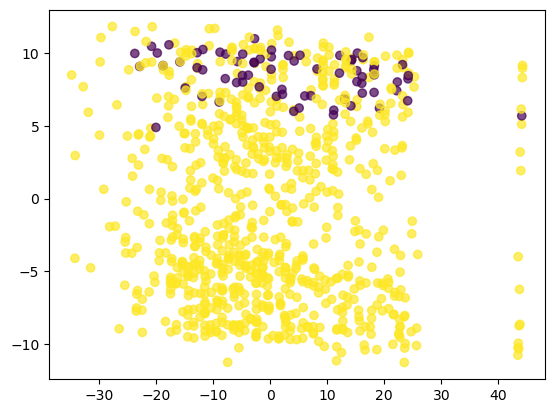

[(0.993248, 0.906157, 0.143936, 1.0), (0.267004, 0.004874, 0.329415, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), (0.993248, 0.906157, 0.143936, 1.0), 

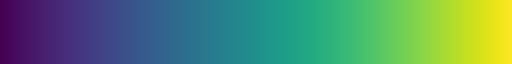

In [211]:
import matplotlib

%matplotlib inline
# viridis = cm.get_cmap('viridis', 14)
stuff = np.linspace(0, 256, num=14)
viridis = matplotlib.colormaps["viridis"]
colors = [viridis(stuff[idx-1]) for idx in y]
plt.scatter(X_decomposed[:, 0], X_decomposed[:, 1], c=colors, alpha=0.7)
plt.show()

print(colors)
viridis

In [202]:
y.describe()

count    867.000000
mean       7.700115
std        4.503274
min        0.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       14.000000
Name: parti, dtype: float64

array([  0.        ,  19.69230769,  39.38461538,  59.07692308,
        78.76923077,  98.46153846, 118.15384615, 137.84615385,
       157.53846154, 177.23076923, 196.92307692, 216.61538462,
       236.30769231, 256.        ])